## Introduction

Muhammad Bintang Ramadhan  
FTDS hacktiv8 batch 8 

## Import Pustaka

In [219]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns   
from datetime import datetime

## Data Loading

In [220]:
#Membuka dataframe menggunakan pandas
df = pd.read_csv('ks-projects-201801.csv')
df.head() #Melihat 5 data teratas dari dataframe df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


## Data Preprocessing

In [221]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [222]:
#Mengecek apakah ada Missing value dan jenis data type tiap column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [223]:
#Memindahkan dataframe asli ke dataframe yang akan di eksplor dan analisa
df_new = df.copy()
df_new.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [224]:
#Dikarenakan ada null dalam column name maka diisi dengan --No Name--
df_new['name'].fillna('--No Name--', inplace=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378661 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [225]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378661 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [226]:
df_new.head(3)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00


## Data Explore

In [227]:
#Mengecek ada negara apa saja dalam column country
df_new['country'].unique()

array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'N,0"',
       'SE', 'FR', 'NL', 'NZ', 'CH', 'AT', 'DK', 'BE', 'HK', 'LU', 'SG',
       'JP'], dtype=object)

In [228]:
#Membuat query kategori komik di Inggris yang sukses
df_gb = df_new[
    (df_new["country"] == 'GB') &
    (df_new["state"] == 'successful') &
    (df_new["category"] == 'Comics')
]
print(len(df_gb))
df_gb.head(3)

149


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
28,1000104953,Rebel Army Origins: The Heroic Story Of Major ...,Comics,Comics,GBP,2016-01-28,100.0,2015-12-29 16:59:29,112.38,successful,27,GB,167.70,160.60,142.91
5318,1027095904,"RENTED... to the DEAD issue 1 ""Zombies... 1000...",Comics,Comics,GBP,2013-08-02,800.0,2013-06-28 19:03:43,2083.00,successful,53,GB,3193.46,3156.25,1212.19
6117,1031249788,A Failed Pursuit: Issue One,Comics,Comics,GBP,2013-05-30,800.0,2013-04-30 11:00:37,925.00,successful,26,GB,1435.18,1409.31,1218.86


In [229]:
# Membuat query Kategori komik di Inggris yang failed
df_gb_f = df_new[
    (df_new["country"] == 'GB') &
    (df_new["state"] == 'failed') &
    (df_new["category"] == 'Comics')
]
print(len(df_gb_f))
df_gb_f.head(3)

111


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
2123,1011085702,London: Travels of a Gen Y Alien,Comics,Comics,GBP,2013-07-07,3000.0,2013-05-23 15:54:16,5.0,failed,1,GB,7.58,7.55,4532.54
4356,102233477,Shadows Comic Book,Comics,Comics,GBP,2013-06-24,1000.0,2013-04-25 13:48:36,70.0,failed,3,GB,106.65,106.81,1525.90
4474,1022865791,The Wretched Hive Bar,Comics,Comics,GBP,2015-09-21,200000.0,2015-08-22 09:15:57,70.0,failed,2,GB,109.83,106.24,303531.59


## Measure of Central Tendency

In [230]:
print ('Min: ' + str(df_gb['usd_goal_real'].min())) #Mencari nilai min dari usd_goal_real kategori komik di Inggris yang sukses
print ('Mode: ' + str(df_gb['usd_goal_real'].mode()[0])) #Mencari nilai yang sering muncul dari usd_goal_real kategori komik di Inggris yang sukses
print ('Median: ' + str(df_gb['usd_goal_real'].median())) #Mencari nilai tengah dari usd_goal_real kategori komik di Inggris yang sukses
print ('Mean: ' + str(df_gb['usd_goal_real'].mean())) #Mencari nilai rata-rata dari usd_goal_real kategori komik di Inggris yang sukses
print ('Max: ' + str(df_gb['usd_goal_real'].max())) #Mencari nilai max dari usd_goal_real kategori komik di Inggris yang sukses

Min: 38.09
Mode: 378.81
Median: 1622.08
Mean: 5162.847449664429
Max: 96192.79


Melihat Distribusi Data dari Kategori komik yang sukses di Inggris

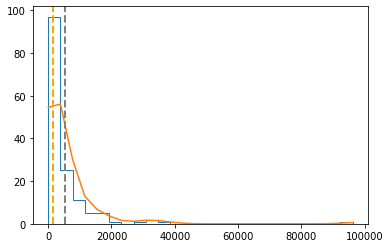

In [231]:
dist = df_gb['usd_goal_real']
density = stats.gaussian_kde(dist)
n, x, _ = plt.hist(dist, histtype='step', bins=25)
plt.plot(x, density(x)*15**5)
plt.axvline(dist.mean(),color='grey', linestyle='dashed', linewidth=2)
plt.axvline(dist.median(), color='orange', linestyle='dashed', linewidth=2)
plt.show()

Mode < Median < Mean bisa dikatakan data dari usd_goal_real Distribusi tidak normal atau bisa disebut Positif Skewness

## Measure Of Variance

Range

In [232]:
max = df_gb['usd_goal_real'].max() #Mencari nilai max dari usd_goal_real kategori komik di Inggris yang sukses
min = df_gb['usd_goal_real'].min() #Mencari nilai min dari usd_goal_real kategori komik di Inggris yang sukses
range = max - min #rumus range adalaha max - min
range #hasil dari range

96154.7

Variance

In [233]:
#Mencari nilai variance dari usd_goal_real kategori komik di Inggris yang sukses
variance = statistics.variance(df_gb['usd_goal_real']) 
variance

98641981.29484344

Standard Deviation

In [234]:
#Mencari nilai standar deviasi dari usd_goal_real kategori komik di Inggris yang sukses
std = statistics.stdev(df_gb['usd_goal_real'])
std

9931.8669591796

## Hypothesis Testing

Menguji apakah pembuatan comic yang sukses di Inggris hanya perlu menghabiskan biaya kurang dari 400 USD  

H0 = mean sample <= 400 USD  

h1 = mean sample > 400 USD  

Maka akan dilakukan hipotesis testing satu sisi kanan.


In [235]:
#Mencari nilai p-value dan t-statistic
t_stat, p_val = stats.ttest_1samp(df_gb['usd_goal_real'], 400)
print(f'P-value:', p_val)
print(f't-statistics:', t_stat)

P-value: 2.981964214569848e-08
t-statistics: 5.8536791242305


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


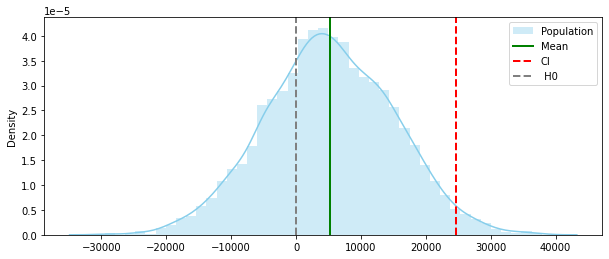

In [236]:
df_gb_pop = np.random.normal(df_gb['usd_goal_real'].mean(), df_gb['usd_goal_real'].std(), 5000)


ci = stats.norm.interval(0.95, df_gb['usd_goal_real'].mean(), df_gb['usd_goal_real'].std())

plt.figure(figsize=(10,4))
sns.distplot(df_gb_pop, label='Population', color='skyblue')
plt.axvline(df_gb['usd_goal_real'].mean(), color='green', label='Mean', linewidth=2)

plt.axvline(ci[1], color='red', label='CI', linewidth=2, linestyle='dashed')

plt.axvline(p_val, color='grey', linestyle='dashed', linewidth=2, label =' H0 ')
plt.legend()

## Kesimpulan
P-value < dari Critical Value yang berarti bahwa H0 ditolak. Maka dapat disimpulkan bahwa membuat comic yang sukses di Inggris perlu menghabiskan biaya lebih besar dari 400 USD 